## Метод главных компонент

<b>Метод Главных Компонент</b> (Principal Components Analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

Для начала рассмотрим несколько примеров. Пусть дана следующая выборка и необходимо кластеризовать данные. Видно, что ось Y является избыточной и для кластеризации достаточно X.
<img src="pca1.png">

Рассмотрим более сложный пример: в данном случае ни проекция на Y, ни проекция на X не дает достаточно информации для кластеризации данных.
<img src="pca2.png">

Однако можно спроецировать данные на линейную комбинацию осей, что даст неплохие результаты.
<img src="pca3.png">

Идея PCA (более формально):
<ul>
  <li>Пусть дано исходное множество векторов $X = \{x_1, ..., x_n\}$, $x_i \in R^m$ линейного пространства $L^n$</li>
  <li>Применение метода главных компонент позволяет перейти к базису пространства $L^K$ ($K \leq n$), такому что:</li>
  <li>Первая компонента (первый вектор базиса) соответствует направлению, вдоль которого дисперсия векторов исходного набора максимальна.</li>
  <li>Направление второй компоненты (второго вектора базиса) выбрано таким образом, чтобы дисперсия исходных векторов вдоль него была максимальной при условии ортогональности первому вектору базиса.</li>
  <li>Аналогично определяются остальные векторы базиса.</li>
</ul>

Загрузите обучающую и тестовую выборку из train_pca.pkl и test_pca.pkl 

In [2]:
!ls

coocurrence.png  pca1.png  pca3.png	    test_pca.pkl   w2v.png
neural.png	 pca2.png  seminar_1.ipynb  train_pca.pkl


In [4]:
import pickle

# your code here
with open("train_pca.pkl","rb") as f:
    train_pca = pickle.load(f)
with open("test_pca.pkl","rb") as f:
    test_pca = pickle.load(f)

Оцените размерность 

Разбейте данные обучающей выборки на 2 кластера при помощь k-means. Замерьте время работы алгоритма.

In [8]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=2)

In [10]:
%%time
k_mean.fit(train_pca)

CPU times: user 178 ms, sys: 235 ms, total: 413 ms
Wall time: 148 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Обучите PCA с 2 компонентами и преобразуйте данные из train

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_pca)
transform_train=pca.transform(train_pca)
# your code here

Измерьте, сколько времени занимает обучени k-means на преобразованных данных. Сравните результаты с полученными ранее

Отрисуйте преобразованные данные, использую функцию scatter из matplotlib.pyplot

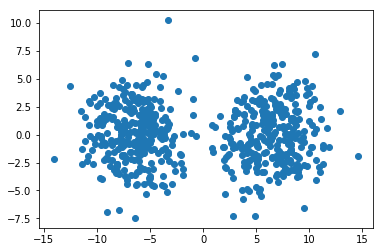

In [50]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(transform_train[:,0],transform_train[:,1])
# plt.plot(transform_train[0],transform_train[1],label='lem',color=np.random.rand(3))
plt.show()
# your code here

С помощью обученного PCA сделайте преобразование тестовых данные и так же отрисуйте их с помощью scatter

In [52]:
# your code here
transform_test=pca.transform(test_pca)

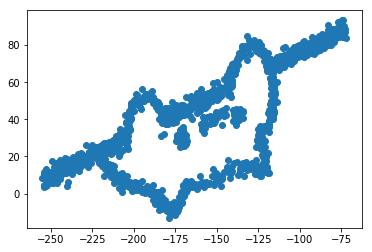

In [56]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(transform_test[:,0],transform_test[:,1])
# plt.plot(transform_train[0],transform_train[1],label='lem',color=np.random.rand(3))
plt.show()
# your code here

# Матрица совстречаемости слов

<b>Матрица совстречаемости слов (words co-occurrence matrix)</b> --- матрица, содержащая информацию о том, как часто 2 и более слова встечаются вместе в корпусе. Например, пусть дано предложение:

<i>"I enjoy flying. I like NLP. I like deep learning."</i>

Тогда матрица совстречаемости слов будет выглядеть следующим образом (за контекст примем 1 слово):
<img src="coocurrence.png">

Таким образом можно получить векторное представление слов. Обычно в таком виде его никто не использует. Вместо этого матрицу совстречаемости раскладывают при помощи PCA, SVD и т.д. на составляющие, комбинация которых дает вектор слова.

Начнем с небольшого примера

In [57]:
docs = ['this this this book',
        'this cat good',
        'cat good shit']

Посчитаем, сколько раз каждое слово корпуса встречается в предложениях, таким образом получим матрицу $X$

In [60]:
# your code here
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
count_vec = CountVectorizer()

In [65]:
X=count_vec.fit_transform(docs)

Используем матричное перемножения для создания матрицы совстречаемости. Пусть $Y$ матрица совстречаемости, тогда $Y = X^TX$, но при этом следует обнулить диагональ получившейся матрицы $Y$, чтобы не учитывать встречаемость слова с самим собой

In [88]:
Y=np.dot(X.T,X)
for i in range(Y.shape[0]):
    Y[i,i]=0


Перейдем к более сложному примеру. Используем датасет 20newsgroups. Загрузим только 4 темы, при этом удалим заголовки, подписи и цитирования, приведем все к нижнему регистру и уберем все символы, кроме букв и цифр

In [90]:
from sklearn.datasets import fetch_20newsgroups
import re

In [93]:
newsgroups_train = fetch_20newsgroups(data_home="./",subset='test',
                                      categories=['sci.med', 'talk.religion.misc'],
                                      remove=('headers', 'footers', 'quotes'))

In [94]:
def preproc(str_text):
    str_text = str_text.lower()
    return re.sub('[^0-9a-zA-Z]', ' ', str_text)

In [95]:
data20 = list(map(preproc, newsgroups_train.data))

Найдем матрицу совстречаемости для получившихся данных

In [96]:
from nltk.corpus import stopwords

In [97]:
stopWords = set(stopwords.words('english'))

In [98]:
# your code here
cv=CountVectorizer(stop_words=stopWords)

In [99]:
X=cv.fit_transform(data20)

In [102]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [129]:
Y=np.dot(X.T,X)
N = Y.shape[0]

Сделайте разложение получившегося векторного представления на 100 главных компанент.

Понадобится метод todense(), так как PCA не работает с sparse matrix.

In [ ]:
# your code here

Выведите 5 ближайших соседей для следующих слов: exercise, benefits, immune, student

In [ ]:
from sklearn.neighbors import NearestNeighbors

# your code here

# w2v

Рассмотрим небольшой текст. Для него построим w2v представление слов.

In [1]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

Приведем корпус к нижнему регистру, чтобы сопоставить слова, которые отличаются только регистром.

In [5]:
# your code here

15

Для удобства работы в будущем, создадим словарь, который переводит слова в int, и словарь, который переводит int в слова. При этом не забудьте, что "." не является словом, и что слова в тексте могут повторяться.

Должно получиться аналогично следующему: <br>
<i>word2int['royal'] --> 15</i> <br>
<i>int2word[15] --> 'royal'</i>

In [ ]:
word2int = {}
int2word = {}

# your code here

In [ ]:
vocab_size = len(word2int)

Разобьем предложения на слова. В итоге должен получиться список, содержащий подсписки. Каждый подсписок соответствует предложению в корпусе и содержит слова этого предложения.

In [ ]:
sentences = []

# your code here

Теперь преобразуем выборку к необходимому нам виду. Будет рассматривать по 2 соседних слова с обеих сторон. При этом не надо составлять пару слова с самим собой и не следует выходить за границы предложений.

Напоминание, как формируется выборка:
<img src="w2v.png">

In [ ]:
WINDOW_SIZE = 2
data = []

# your code here

Разобьем выборку на обучающую и тестовую.

In [ ]:
x_train = [] # input word
y_train = [] # output word

# your code here

Изменим представление слов при помощи one hot encoding. Для этого пригодятся словари, которые вы создали в начале.

In [ ]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [ ]:
# your code here

Теперь каждому слову нашего датасета соответствует one hot encoded вектор. Можно приступить к созданию самой модели.

Напоминание, как выглядит модель:
<img src="neural.png">

In [ ]:
import tensorflow as tf

Опишем входной слой модели, то есть тот слой, куда будет подаваться наша обучающая выборка <b>x_train</b>. Помните, что размерность равна $vocab\_size$

In [ ]:
x = # your code here

Так же опишем вход для тестовых данных $y\_train$.

In [ ]:
y = # your code here

Теперь опишем скрытый слой (hidden layer) $H$. Этот слой имеет линейную функцию активации $f(x) = x$, поэтому данный слой можно описать следующим образом:
<center>$H = x * W_1$</center>

Где $W_1$ обучаемая матрица весов. Полученная таким образом матрица $H$ должна быть размером $n$ x $d$, где $n$ --- количество элементов в $X_{train}$, $d$ --- размер эмбедингов.

In [ ]:
EMBEDDING_DIM = # размерность эмбедингов (задайте сами)

W1 = # your code here
H = # your code here

Наконец, опишем выходной слой $prediction$. Функцией активации этого слоя является softmax, поэтому слой можно представить в виде:
<center>$prediction = softmax(H * W_2)$</center>
Матрица $prediction$ должна быть размера $n$ x $vocab\_size$

In [ ]:
W2 = # your code here
prediction = # your code here

Наконец, можем начать обучать модель. Объявите и запустите сессию.

In [ ]:
sess = # your code here

Определим функцию потерь

In [ ]:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(prediction),
                                                   reduction_indices=[1]))

Будем обучать модель при помощи градиентного спуска. Объявите Optimizer

In [ ]:
optimizer = # your code here

Пора обучать :)

In [ ]:
n_iters = 
for _ in range(n_iters):
    # your code here

Выведите получившуюся матрицу весов $W1$

In [ ]:
# your code here

Выведете векторное представление слова <i>"queen"</i>

In [ ]:
# your code here

Немного поиграем с получившимися представлениями. Для этого напишем функцию, находящую ближайший вектор к данному вектору

In [ ]:
import numpy as np

In [ ]:
def euclidean_dist(vec1, vec2):
    # your code here

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

Найдите для слов  "king', "queen" и "royal" ближайшие к ним

In [ ]:
# your code here

Теперь попробуем визуализировать полученные представления. Для начала уменьшим размерность эмбедингов до 2. Здесь пригодится PCA, изученный ранее.

In [ ]:
# your code here

Нормализуем полученные вектора для удобства отображения

In [ ]:
from sklearn.preprocessing import Normalizer

# your code here

Наконец, можем отрисовать получившиеся вектора

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

# Работа с предобученными эмбедингами

Помимо того, чтобы обучать w2v, так же следует уметь работать с уже предобученными веторными представлениями. Рассмотрим библиотеку gensim, которая позволяет это делать

In [ ]:
!pip install gensim

In [1]:
import gensim.downloader as api

In [ ]:
info = api.info()  # show info about available models/datasets
model = api.load("glove-twitter-25")  # download the model and return as object ready for use

Можешь узнать векторное представление слова

In [ ]:
vector = model.wv['cat']

In [ ]:
vector

Например, мы можем найти наиболее близкие слова в данном корпусе для некоторого заданного слова

In [ ]:
model.most_similar("cat")

Или же можем найти частотность слова в корпусе

In [ ]:
model.vocab["cat"].count

Нарисуйте график зависимости нормы w2v от частоты появления этого слова в корпусе

In [ ]:
# your code here